In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
train=pd.read_csv("C:\\Users\\Asus\\Downloads\\industrypower\\Dataset\\Training.csv")

In [3]:
test=pd.read_csv("C:\\Users\\Asus\\Downloads\\industrypower\\Dataset\\Test.csv")

In [4]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
train.head()

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,Date
0,1/1/2018 0:14,3.21,2.96,0.0,73.21,100.0,Low,105,1/1/2018
1,1/1/2018 0:30,3.95,4.46,0.0,66.78,100.0,Low,101,1/1/2018
2,1/1/2018 0:45,3.23,3.28,0.0,70.27,100.0,Low,94,1/1/2018
3,1/1/2018 0:59,3.33,3.56,0.0,68.10,100.0,Low,99,1/1/2018
4,1/1/2018 1:15,3.79,4.49,0.0,64.72,100.0,Low,109,1/1/2018


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32850 entries, 0 to 32849
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          32850 non-null  object 
 1   Energy_Consumption            32850 non-null  float64
 2   LaRP                          32850 non-null  float64
 3   LeRP                          32850 non-null  float64
 4   LaPF                          32850 non-null  float64
 5   LePF                          32850 non-null  float64
 6   Duty                          32850 non-null  object 
 7   Emissions_Air_Quality_Metric  32850 non-null  int64  
 8   Date                          32850 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
#format='%m/%d/%Y %H:%M'
train['date'] = pd.to_datetime(train['date'])


In [8]:
train.head()

,date,Energy_Consumption,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric,Date
0,2018-01-01 00:14:00,3.21,2.96,0.0,73.21,100.0,Low,105,1/1/2018
1,2018-01-01 00:30:00,3.95,4.46,0.0,66.78,100.0,Low,101,1/1/2018
2,2018-01-01 00:45:00,3.23,3.28,0.0,70.27,100.0,Low,94,1/1/2018
3,2018-01-01 00:59:00,3.33,3.56,0.0,68.10,100.0,Low,99,1/1/2018
4,2018-01-01 01:15:00,3.79,4.49,0.0,64.72,100.0,Low,109,1/1/2018


In [9]:
numeric_columns = ['Energy_Consumption', 'LaRP', 'LeRP', 'LaPF', 'LePF', 'Emissions_Air_Quality_Metric']
train[numeric_columns] = train[numeric_columns].apply(pd.to_numeric, errors='coerce')

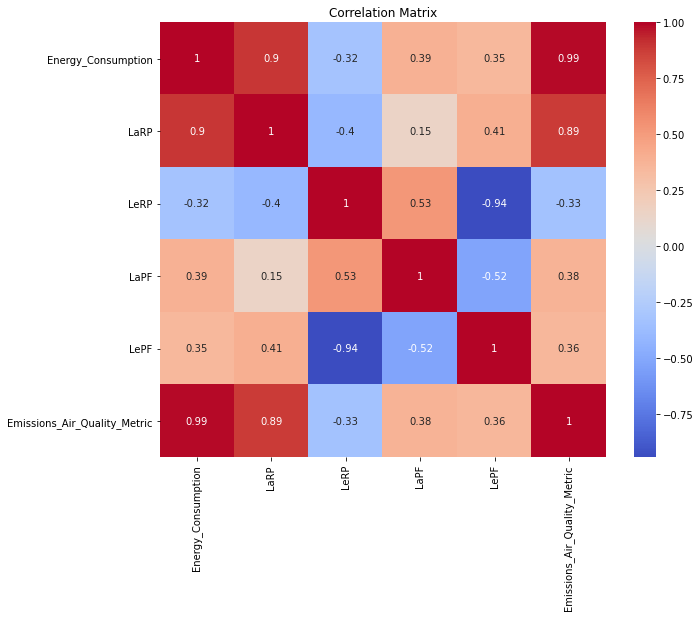

In [10]:
correlation_matrix = train[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [11]:
X = train[['LaRP', 'LeRP', 'LaPF', 'LePF', 'Duty', 'Emissions_Air_Quality_Metric']]
y = train['Energy_Consumption']

In [12]:
X = pd.get_dummies(X, columns=['Duty'], drop_first=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')

Mean Squared Error: 20.94683975858322
R squared: 0.9814453137562226


In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rfr = RandomForestRegressor()

In [31]:
rfr.fit(X_train, y_train)

# Make predictions
y_pred1 = rfr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mse)

# Print RMSE
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')



Root Mean Squared Error: 0.7968188603599945
Mean Squared Error: 0.6349202962254004
R squared: 0.9994375883416284


In [18]:
from sklearn.svm import SVR, LinearSVR

In [19]:
base_model = SVR()
base_model.fit(X_train, y_train)
y_pred2 = base_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')

Mean Squared Error: 15.761678972082409
R squared: 0.9860383231373937


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
grd = GradientBoostingRegressor()

In [23]:
grd.fit(X_train, y_train)
y_pred3 = grd.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')

Mean Squared Error: 8.159168349428688
R squared: 0.9927726181859116


In [38]:
test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [39]:
test.head()

,TimeStamp,LaRP,LeRP,LaPF,LePF,Duty,Emissions_Air_Quality_Metric
0,2018-01-01 02:45:00,4.04,0.00,65.15,100.00,Low,109
1,2018-01-01 09:45:00,0.00,19.22,100.00,20.00,Low,104
2,2018-01-01 11:15:00,0.00,5.66,100.00,52.55,Low,100
3,2018-01-01 18:15:00,0.00,8.96,100.00,40.77,Low,106
4,2018-01-01 18:30:00,0.00,5.46,100.00,53.02,Low,104


In [40]:
test1=pd.get_dummies(test, columns=['Duty'], drop_first=True)

In [41]:
test1

,TimeStamp,LaRP,LeRP,LaPF,LePF,Emissions_Air_Quality_Metric,Duty_Low,Duty_Major
0,2018-01-01 02:45:00,4.04,0.00,65.15,100.00,109,1,0
1,2018-01-01 09:45:00,0.00,19.22,100.00,20.00,104,1,0
2,2018-01-01 11:15:00,0.00,5.66,100.00,52.55,100,1,0
3,2018-01-01 18:15:00,0.00,8.96,100.00,40.77,106,1,0
4,2018-01-01 18:30:00,0.00,5.46,100.00,53.02,104,1,0
...,...,...,...,...,...,...,...,...
2185,2018-12-31 12:45:00,0.00,13.22,100.00,24.57,96,1,0
2186,2018-12-31 13:30:00,0.00,13.50,100.00,23.80,99,1,0
2187,2018-12-31 18:15:00,0.00,5.88,100.00,49.57,101,1,0
2188,2018-12-31 20:00:00,0.00,20.08,100.00,20.19,105,1,0


In [57]:
prediction=rfr.predict(test1[['LaRP', 'LeRP', 'LaPF', 'LePF', 'Duty_Low', 'Emissions_Air_Quality_Metric','Duty_Major']])

In [58]:
prediction

array([3.4448, 3.9178, 3.4708, ..., 3.3678, 4.1195, 3.8334])

In [59]:
result = pd.DataFrame(prediction, columns=["Energy_Consumption"])

In [60]:
result

,Energy_Consumption
0,3.4448
1,3.9178
2,3.4708
3,3.9503
4,3.4170
...,...
2185,3.3770
2186,3.2846
2187,3.3678
2188,4.1195


In [61]:
result.to_csv("C:\\Users\\Asus\\Downloads\\industrypower\\Dataset\\result.csv", index=False)